Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv


<ipython-input-1-c6ce68946e17>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-1-c6ce68946e17>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


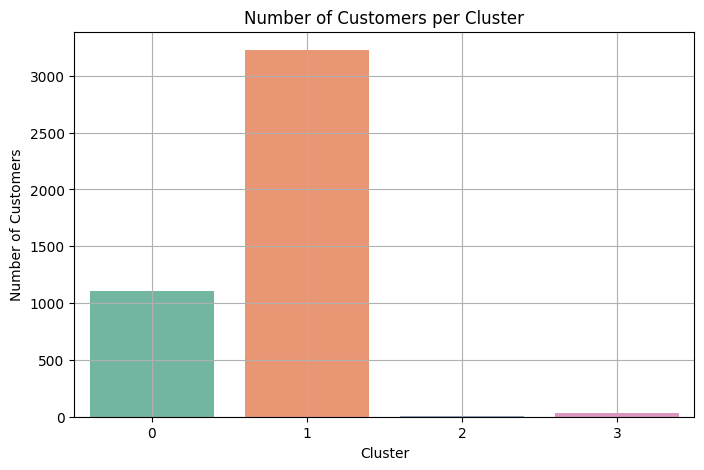


🧠 Designer HashMap Matrix:

🔷 Cluster 0
   - Avg Recency  : 245.38 days
   - Avg Frequency: 1.85 orders
   - Avg Monetary : $461.22
   - Total Customers: 1105

🔷 Cluster 1
   - Avg Recency  : 39.28 days
   - Avg Frequency: 5.38 orders
   - Avg Monetary : $1710.81
   - Total Customers: 3227

🔷 Cluster 2
   - Avg Recency  : 2.0 days
   - Avg Frequency: 110.5 orders
   - Avg Monetary : $213995.58
   - Total Customers: 4

🔷 Cluster 3
   - Avg Recency  : 4.17 days
   - Avg Frequency: 65.11 orders
   - Avg Monetary : $39268.46
   - Total Customers: 36

📉 Simulated Confusion Matrix (based on Recency bins vs predicted cluster):
[[   0 2911    4   36]
 [ 283  316    0    0]
 [ 466    0    0    0]
 [ 356    0    0    0]]


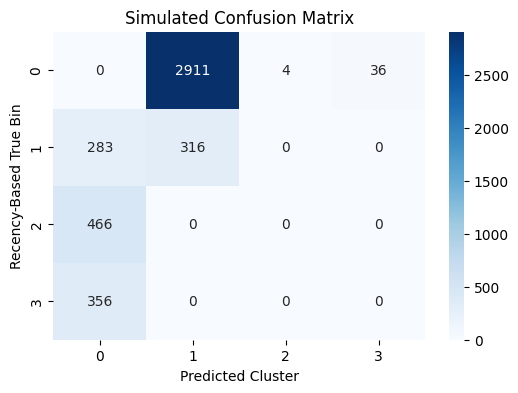

In [1]:
# Step 1: Upload file from desktop
from google.colab import files
uploaded = files.upload()
# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

# Step 3: Load and clean data
df = pd.read_csv("9. Customer Segmentation in E-commerce.csv")
df = df[df['CustomerID'].notnull()]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Step 4: Prepare RFM manually
customers = df['CustomerID'].unique()
recency_list = []
frequency_list = []
monetary_list = []

last_date = df['InvoiceDate'].max()

for customer in customers:
    cust_data = df[df['CustomerID'] == customer]
    recency = (last_date - cust_data['InvoiceDate'].max()).days
    frequency = len(cust_data['InvoiceNo'].unique())
    monetary = cust_data['TotalPrice'].sum()

    recency_list.append(recency)
    frequency_list.append(frequency)
    monetary_list.append(monetary)

rfm = pd.DataFrame({
    'CustomerID': customers,
    'Recency': recency_list,
    'Frequency': frequency_list,
    'Monetary': monetary_list
})

# Step 5: Normalize and cluster
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 6: Bar chart of cluster sizes
plt.figure(figsize=(8, 5))
cluster_counts = rfm['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

# Step 7: Designer HashMap Matrix (manual)
print("\n🧠 Designer HashMap Matrix:")
for i in sorted(rfm['Cluster'].unique()):
    cl = rfm[rfm['Cluster'] == i]
    print(f"\n🔷 Cluster {i}")
    print(f"   - Avg Recency  : {round(cl['Recency'].mean(), 2)} days")
    print(f"   - Avg Frequency: {round(cl['Frequency'].mean(), 2)} orders")
    print(f"   - Avg Monetary : ${round(cl['Monetary'].mean(), 2)}")
    print(f"   - Total Customers: {len(cl)}")

# Step 8: Confusion Matrix (simulated, since we don’t have true labels)
# We'll simulate "true labels" for educational purposes by cutting Recency into 4 bins
true_labels = pd.cut(rfm['Recency'], bins=4, labels=[0, 1, 2, 3]).astype(int)
predicted = rfm['Cluster']

cm = confusion_matrix(true_labels, predicted)

# Print confusion matrix
print("\n📉 Simulated Confusion Matrix (based on Recency bins vs predicted cluster):")
print(cm)

# Optional: visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('Predicted Cluster')
plt.ylabel('Recency-Based True Bin')
plt.title('Simulated Confusion Matrix')
plt.show()
